In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("CO2 dataset.xlsx")

In [3]:
df

,Year,CO2
0,1800.0,0.00568
1,1801.0,0.00561
2,1802.0,0.00555
3,1803.0,0.00548
4,1804.0,0.00542
...,...,...
210,2010.0,15.60000
211,2011.0,15.60000
212,2012.0,14.80000
213,2013.0,14.70000


                                             |                                             | [  0%]   00:00 ->…


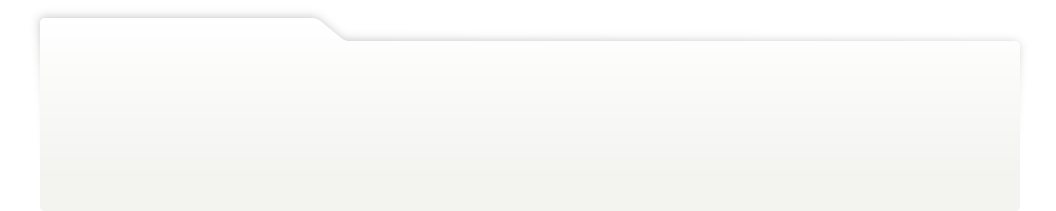
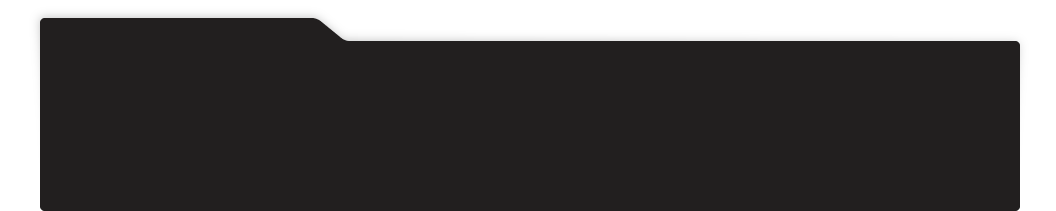
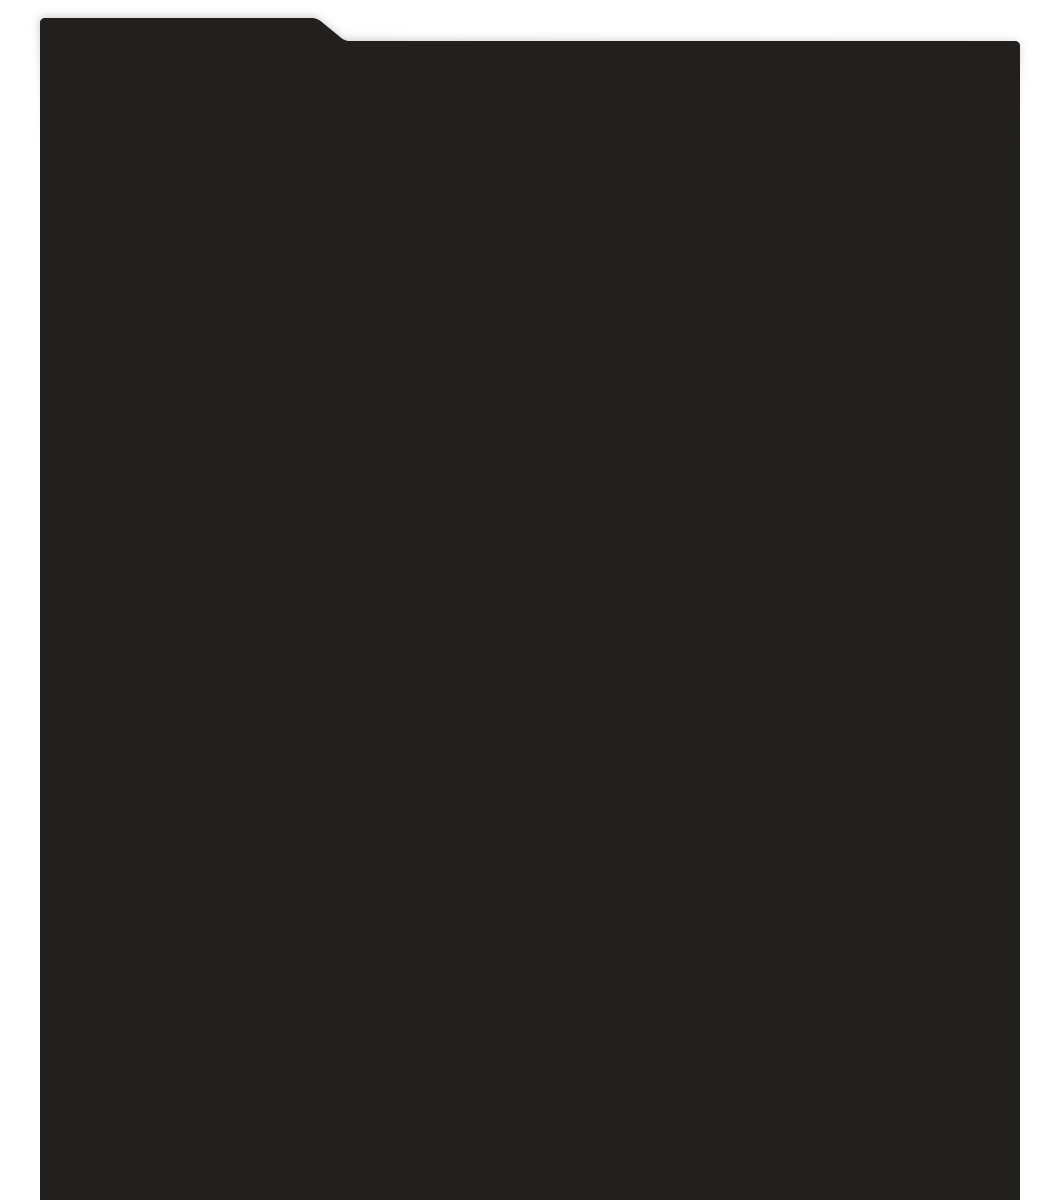
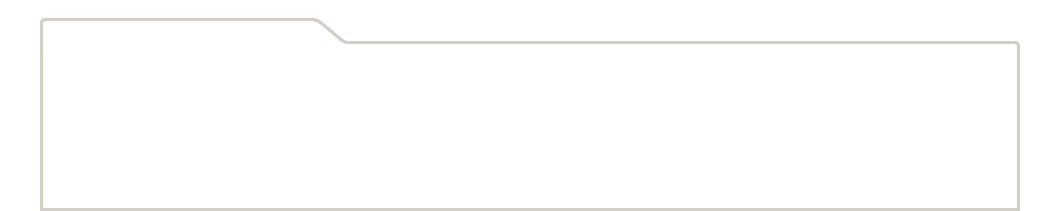
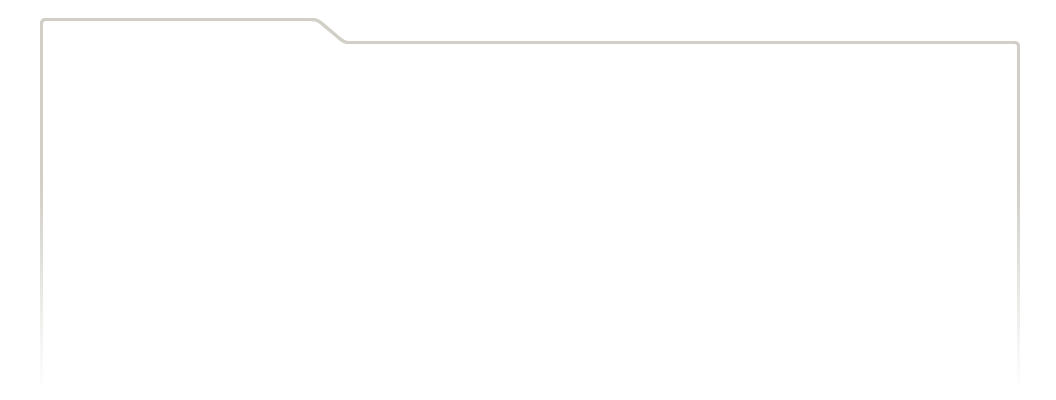
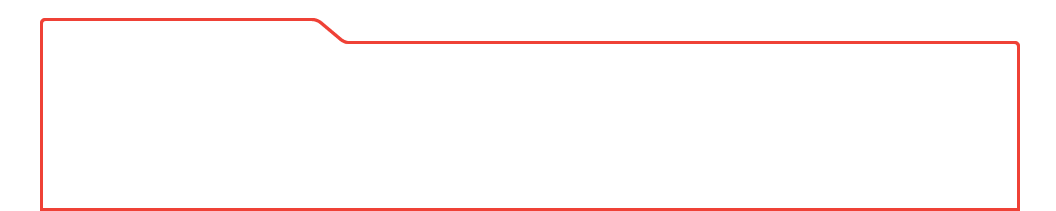
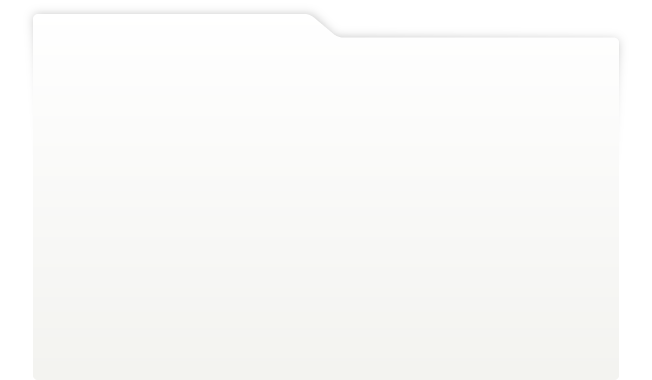
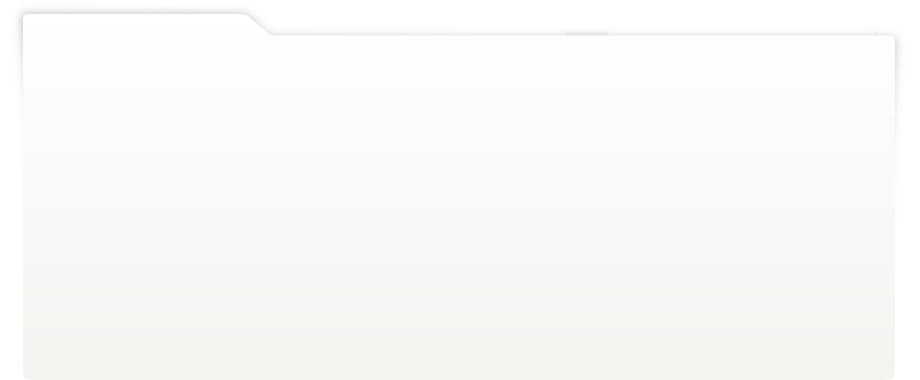
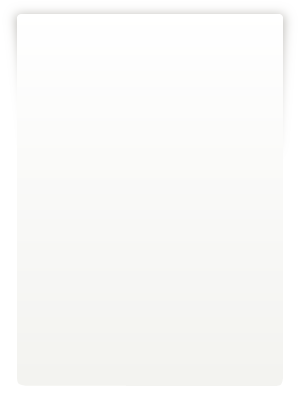
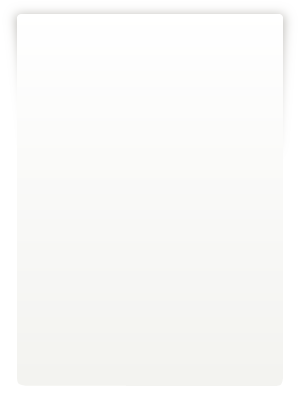
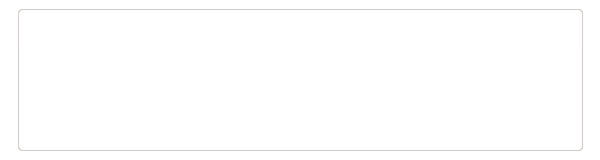
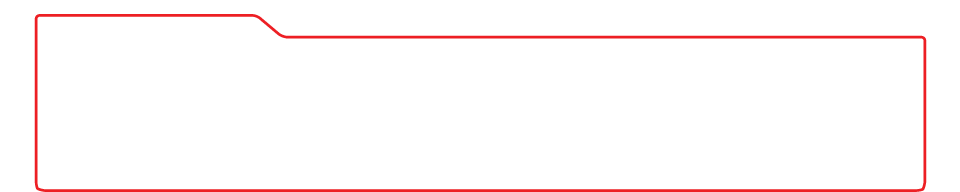
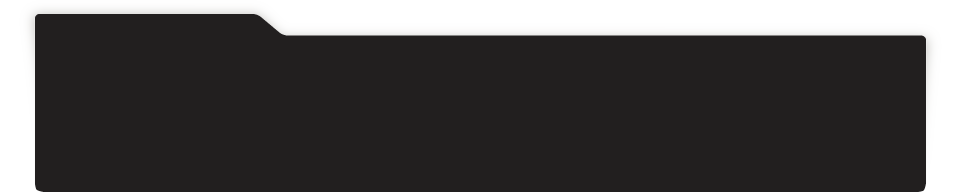
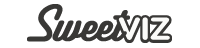
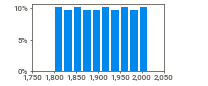
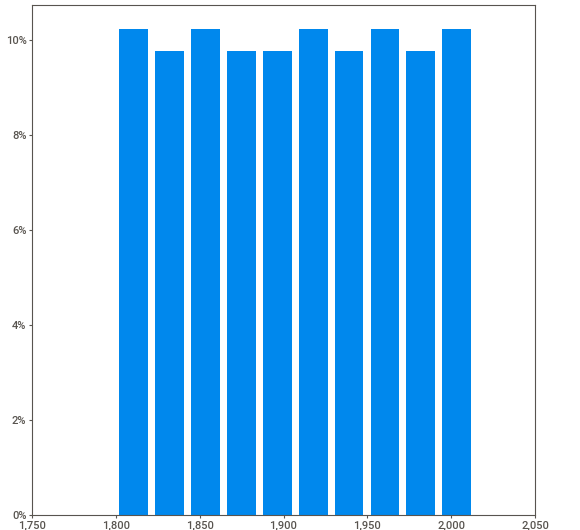
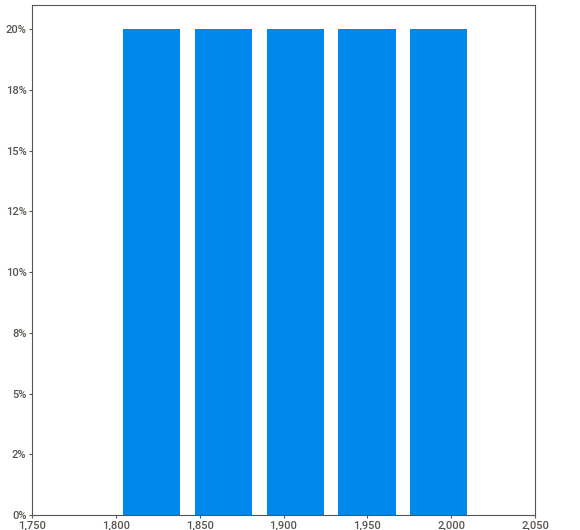
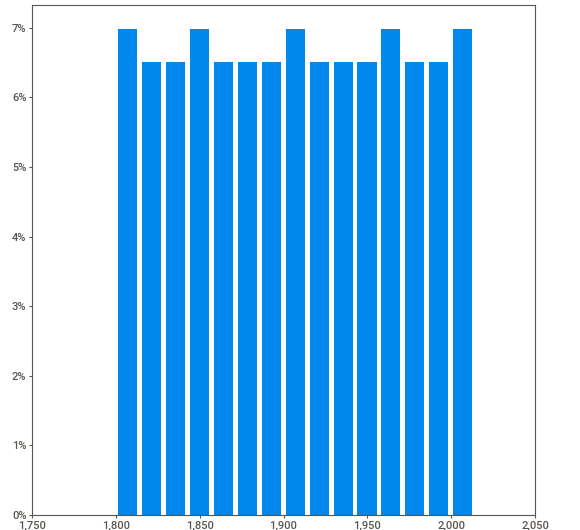
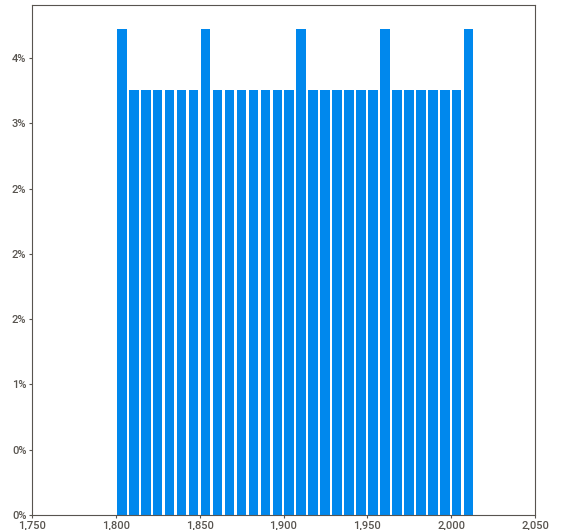
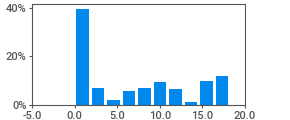
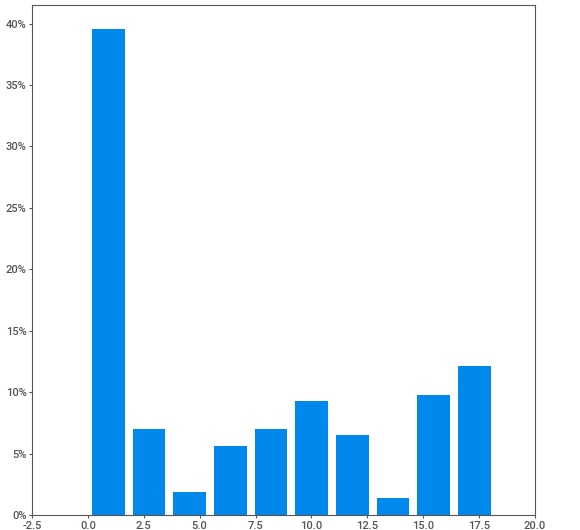
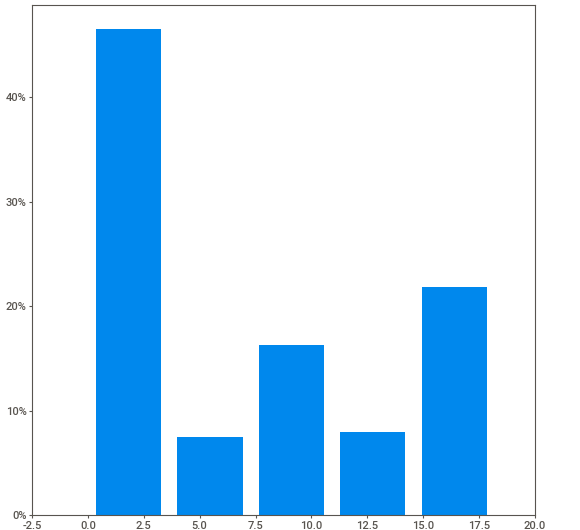
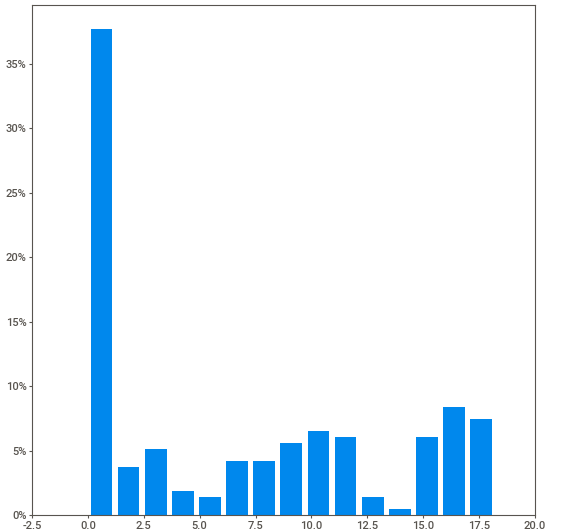
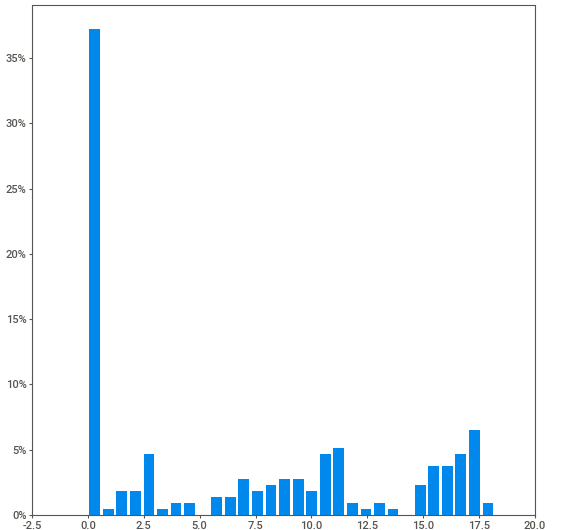
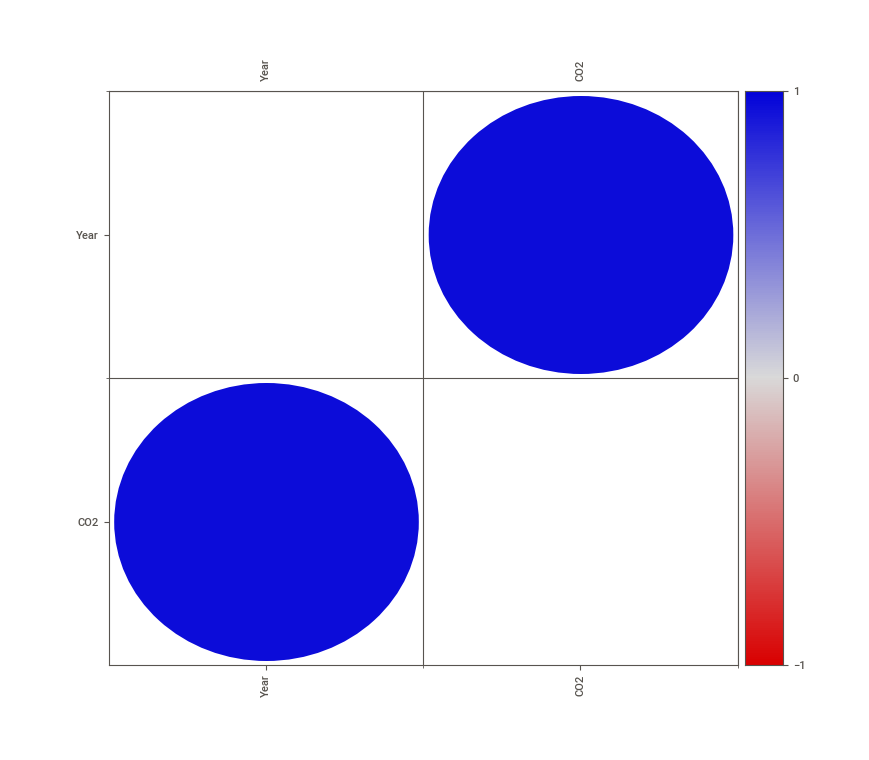
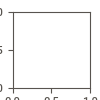

Report Co2_SV_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [4]:
# 1. Using Sweetviz
import sweetviz as sv
sweet_report=sv.analyze(df)
sweet_report.show_notebook()
sweet_report.show_html('Co2_SV_Report.html')

In [5]:
df.isna().sum()

Year    0
CO2     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    215 non-null    float64
 1   CO2     215 non-null    float64
dtypes: float64(2)
memory usage: 3.5 KB


In [7]:
df.shape

(215, 2)

In [8]:
df.describe

<bound method NDFrame.describe of        Year       CO2
0    1800.0   0.00568
1    1801.0   0.00561
2    1802.0   0.00555
3    1803.0   0.00548
4    1804.0   0.00542
..      ...       ...
210  2010.0  15.60000
211  2011.0  15.60000
212  2012.0  14.80000
213  2013.0  14.70000
214  2014.0  15.10000

[215 rows x 2 columns]>

In [9]:
df.dtypes

Year    float64
CO2     float64
dtype: object

In [10]:
#checking for time intervals
x=df.Year.diff()
for i in x:
    if i == 1:
        pass
    else:
        print(i)

nan


In [11]:
co2=df.copy()

In [12]:
co2

,Year,CO2
0,1800.0,0.00568
1,1801.0,0.00561
2,1802.0,0.00555
3,1803.0,0.00548
4,1804.0,0.00542
...,...,...
210,2010.0,15.60000
211,2011.0,15.60000
212,2012.0,14.80000
213,2013.0,14.70000


converting the float to datetime format

In [13]:
Year = pd.date_range(start="1/1/1800",end="1/1/2015",freq='A')
Year

DatetimeIndex(['1800-12-31', '1801-12-31', '1802-12-31', '1803-12-31',
               '1804-12-31', '1805-12-31', '1806-12-31', '1807-12-31',
               '1808-12-31', '1809-12-31',
               ...
               '2005-12-31', '2006-12-31', '2007-12-31', '2008-12-31',
               '2009-12-31', '2010-12-31', '2011-12-31', '2012-12-31',
               '2013-12-31', '2014-12-31'],
              dtype='datetime64[ns]', length=215, freq='A-DEC')

In [14]:
co2=co2.drop(['Year'],axis=1)
co2['Year'] =Year
co2.set_index(co2.Year,inplace=True)
co2=co2.iloc[:,0:1]
co2.head()

,CO2
Year,
1800-12-31,0.00568
1801-12-31,0.00561
1802-12-31,0.00555
1803-12-31,0.00548
1804-12-31,0.00542


In [15]:
co2.dtypes

CO2    float64
dtype: object

### Analysing Data With Graphs

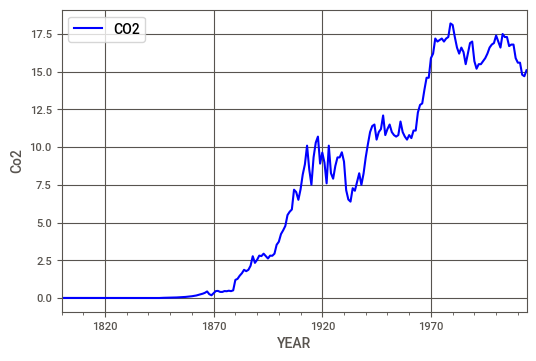

In [16]:
#line plot
co2.plot(color='blue')
plt.xlabel("YEAR")
plt.ylabel("Co2")
plt.grid()
plt.show()

**from above lineplot shows that C02 emission over the period of time is increasing therefore data is showing exponential trend but no seasonality is present in data.

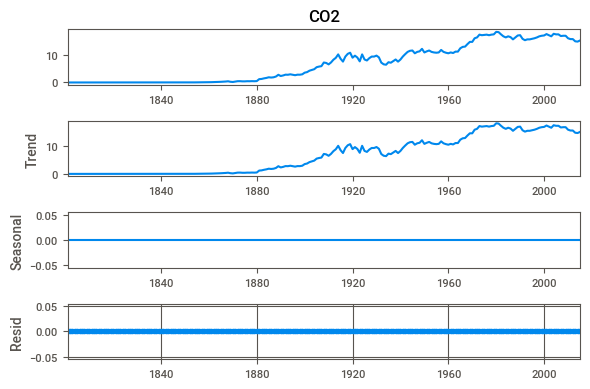

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(co2.CO2)
decompose.plot()
plt.grid()
plt.show()

**Seasonal demoposition shows that 
 1. avarage is not constant for the co2 emission over the period of time
 2. there is a tred followed by data which is of exponential type 
 3. seasonality is not present in the data
 4. there are no residuals

<AxesSubplot:ylabel='Density'>

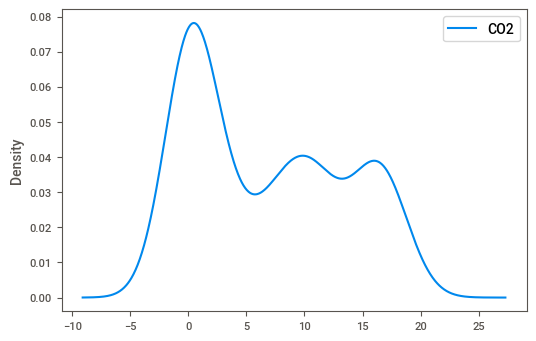

In [18]:
co2.plot(kind='kde')

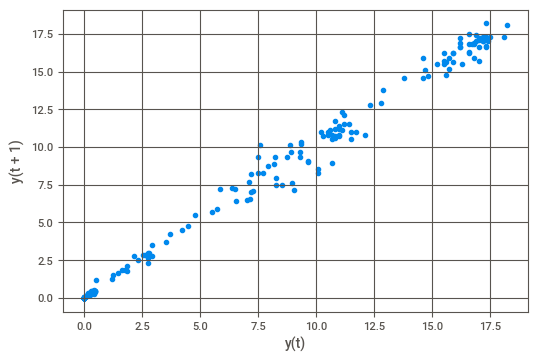

In [19]:
#lag plot
from pandas.plotting import lag_plot
lag_plot(co2,)
plt.grid()
plt.show()

**lag plots shows that there is positive liner relation between variable and its own lag variable 

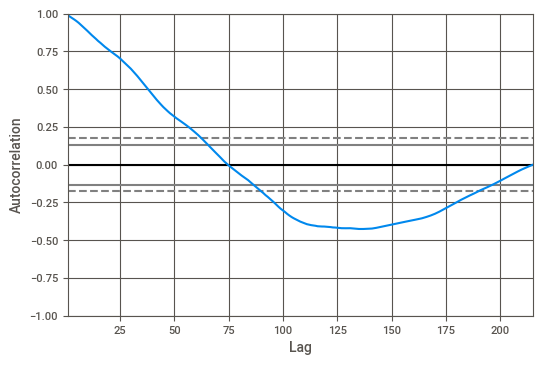

In [20]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(co2)
plt.show()

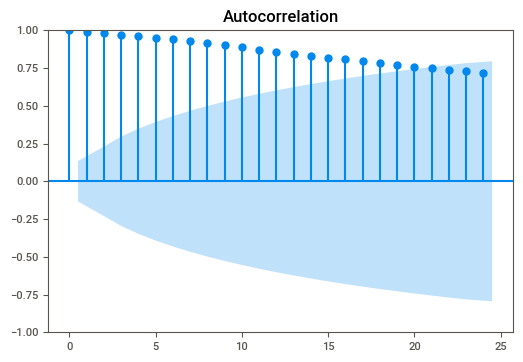

In [21]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(co2.CO2)
plt.show()

**from the above graph we can examine that nearest time lag has good autocorrelation but as we reach time      period which are far away the autocorrelation is decressing

Modifing the data 
* including columns : "t"-time,"t_square"-time square,"log_co2"-log of Co2

In [22]:
data=co2.copy()
data["t"]=np.arange(1,216)
data["t_squared"]=data["t"]*data["t"]
data["log_CO2"]=np.log(co2["CO2"])
data_1=data.drop(["CO2"],axis=1)
data_2=data_1.drop(['log_CO2'],axis=1)
data.head()

,CO2,t,t_squared,log_CO2
Year,,,,
1800-12-31,0.00568,1,1,-5.170804
1801-12-31,0.00561,2,4,-5.183205
1802-12-31,0.00555,3,9,-5.193957
1803-12-31,0.00548,4,16,-5.206650
1804-12-31,0.00542,5,25,-5.217659
